In [1]:
from glob import glob
import os.path as op
import pandas as pd
import matplotlib.pyplot as plt

Vamos a cargar todos los dato que hemos descargado en un DataFrame para poder inspeccionar rápidamente qué modelos tenemos descargados.

In [2]:
ficheros = glob("/srv/SystematicClimate/CMIP6/*.nc")

In [3]:
df = pd.DataFrame(index=list(range(len(ficheros))), columns=["Var", "TRes", "Model", "Scenario", "Ensemble", "NPI", "Dates", "File"])

In [4]:
for idx, i in enumerate(ficheros):
    df.loc[idx] = [*op.basename(i).split(".")[0].split("_"), i]

In [5]:
df["InitDate"] = df["Dates"].apply(lambda x: int(x.split("-")[0][:4]))
df["EndDate"] = df["Dates"].apply(lambda x: int(x.split("-")[1][:4]))
df["TCoverage"] = df["EndDate"] - df["InitDate"]
df = df[df["EndDate"]>=2014]
df = df.drop("Dates", axis=1)
df = df.reset_index()

In [6]:
df.head()

,index,Var,TRes,Model,Scenario,Ensemble,NPI,File,InitDate,EndDate,TCoverage
0,1,pr,day,IPSL-CM6A-LR,historical,r11i1p1f1,gr,/srv/SystematicClimate/CMIP6/pr_day_IPSL-CM6A-...,1850,2014,164
1,6,pr,day,CAMS-CSM1-0,historical,r2i1p1f1,gn,/srv/SystematicClimate/CMIP6/pr_day_CAMS-CSM1-...,1850,2014,164
2,7,pr,day,CanESM5,historical,r19i1p2f1,gn,/srv/SystematicClimate/CMIP6/pr_day_CanESM5_hi...,1850,2014,164
3,10,pr,day,IPSL-CM6A-LR,historical,r12i1p1f1,gr,/srv/SystematicClimate/CMIP6/pr_day_IPSL-CM6A-...,1850,2014,164
4,11,pr,day,IPSL-CM6A-LR,historical,r3i1p1f1,gr,/srv/SystematicClimate/CMIP6/pr_day_IPSL-CM6A-...,1850,2014,164


Y vamos a listar qué modelos tenemos para cada variable. Nos interesan, por el momento, las variables pr y prc, que son la precipitación no convectiva y la convectiva, respectivamente. Precipitación es cualquier flujo de agua desde la atmósfera hacia la superficie, bien en forma líquida o sólida. Precipitación no convectiva es la que resulta de grandes sistemas frontales, la que afecta a grandes zonas, mientras que la convectiva es la típica que surge de tormentas generadas por la evaporación. El modelo las separa porque la no convectiva la resuelve mediante las ecuaciones del modelo, mientras que la no convectiva la tiene que «modelar» con un modelo en que el proceso físico se parametriza. 

In [7]:
for g in df.groupby("Var"):
    print(f"For var {g[0]} we have the following models:")
    for idx, i in enumerate(g[1]["Model"].unique()):
        print("\t{0:4d}  - {1:s}".format(idx+1, i))

For var pr we have the following models:
	   1  - IPSL-CM6A-LR
	   2  - CAMS-CSM1-0
	   3  - CanESM5
	   4  - NorCPM1
	   5  - KACE-1-0-G
	   6  - BCC-ESM1
	   7  - IPSL-CM5A2-INCA
	   8  - KIOST-ESM
	   9  - IPSL-CM6A-LR-INCA
For var prc we have the following models:
	   1  - CanESM5
	   2  - IPSL-CM6A-LR
	   3  - CNRM-ESM2-1
	   4  - CNRM-CM6-1
	   5  - BCC-ESM1


# Check data content

In [8]:
import iris
import iris.plot as iplt
import seaborn as sns
import numpy as np

In [9]:
cubes = iris.load(df.loc[0].File)

/home/manuel/miniconda3/envs/sysclim/lib/python3.9/site-packages/iris/fileformats/cf.py:374: UserWarning: Missing CF-netCDF boundary variable 'time_bounds', referenced by netCDF variable 'time'
  warnings.warn(message % (name, nc_var_name))
/home/manuel/miniconda3/envs/sysclim/lib/python3.9/site-packages/iris/fileformats/cf.py:861: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(


In [10]:
print(cubes)

0: precipitation_flux / (kg m-2 s-1)   (time: 60265; latitude: 10; lon: 5)


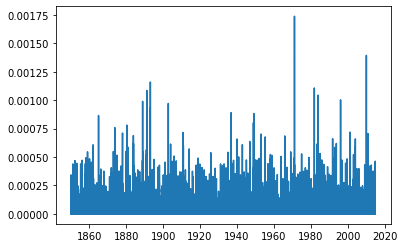

In [11]:
iplt.plot(cubes[0][:,0,0])

/tmp/ipykernel_30116/3819972166.py:1: RuntimeWarning: divide by zero encountered in log
  sns.histplot(np.log(cubes[0][:,0,0].data))


<AxesSubplot:ylabel='Count'>

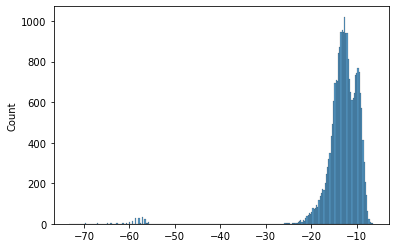

In [12]:
sns.histplot(np.log(cubes[0][:,0,0].data))

In [136]:
c.shape

(60265, 1, 1)